In [27]:
import pandas as pd

# Rutas de los archivos
file_2018 = "ks-projects-201801.csv"

def describir_dataset(file_path, dataset_name):
    print("="*80)
    print(f"DESCRIPCIÓN GENERAL DEL DATASET: {dataset_name}")
    print("="*80)
    
    # Cargar dataset (latin1 por caracteres especiales)
    df = pd.read_csv(file_path, encoding="latin1", low_memory=False)
    
    # Dimensiones
    print("\n Dimensiones del conjunto de datos")
    print(f"Número de registros (filas): {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}")
    
    # Tipos de datos
    print("\n Tipos de datos por columna")
    display(df.dtypes.to_frame(name="Tipo de dato"))
    
    # Vista general
    print("\n Vista general de la estructura")
    display(df.head())
    
    # Resumen de valores nulos
    print("\n Valores nulos por columna")
    display(df.isnull().sum().to_frame(name="Valores nulos"))
    
# Ejecutar análisis para ambos archivos
describir_dataset(file_2018, "Kickstarter Projects - Enero 2018")

DESCRIPCIÓN GENERAL DEL DATASET: Kickstarter Projects - Enero 2018

 Dimensiones del conjunto de datos
Número de registros (filas): 378661
Número de columnas: 15

 Tipos de datos por columna


,Tipo de dato
ID,int64
name,object
category,object
main_category,object
currency,object
deadline,object
goal,float64
launched,object
pledged,float64
state,object



 Vista general de la estructura


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00



 Valores nulos por columna


,Valores nulos
ID,0
name,4
category,0
main_category,0
currency,0
deadline,0
goal,0
launched,0
pledged,0
state,0


# Exploración inicial del conjunto de datos Kickstarter 2018

## Importación y contexto

El conjunto de datos Kickstarter Projects 2018 fue importado en un Jupyter Notebook utilizando la biblioteca pandas. Para la exploración inicial se emplearon las bibliotecas pandas, numpy y matplotlib, las cuales permiten analizar la estructura, tipos de datos y posibles problemas de calidad del conjunto de datos.

## Descripción general del conjunto de datos

El dataset contiene 378,661 registros y 15 columnas. Cada fila representa un proyecto de financiamiento colectivo publicado en la plataforma Kickstarter, mientras que cada columna describe un atributo específico del proyecto, como su categoría, estado, montos financieros y fechas relevantes.

La estructura del conjunto de datos es tabular, lo que facilita su análisis exploratorio y posterior evaluación de calidad de datos.

## Tipos de datos

El análisis de los tipos de datos por columna muestra una combinación de variables categóricas, numéricas y temporales. Las variables categóricas incluyen información relacionada con la clasificación del proyecto, su estado y contexto geográfico. Las variables numéricas representan montos financieros y conteos, como objetivos de financiamiento y número de patrocinadores. Asimismo, se identifican columnas asociadas a fechas de lanzamiento y cierre de los proyectos.

Esta diversidad de tipos de datos permite realizar análisis estadísticos, validaciones lógicas y evaluaciones de calidad en distintas dimensiones.

## Valores nulos y estructura

El análisis de valores nulos indica que algunas columnas presentan datos faltantes, lo que afecta la completitud del conjunto de datos. La visualización de valores nulos por columna permite identificar de forma clara qué atributos requieren atención adicional durante las etapas de limpieza y preparación de datos.

En general, el dataset presenta una estructura consistente, aunque la presencia de valores nulos y tipos de datos mixtos en algunas columnas sugiere la necesidad de aplicar procesos de depuración antes de realizar análisis más avanzados.

## Observaciones generales

El conjunto de datos Kickstarter 2018 es amplio y heterogéneo, adecuado para análisis exploratorio y estudios de calidad de datos. Su tamaño y variedad de variables lo hacen especialmente útil para identificar patrones, evaluar consistencia y analizar problemas reales asociados a datos del mundo real.

In [7]:
#CARGA DE DATOS
import pandas as pd
import matplotlib.pyplot as plt

df_2018 = pd.read_csv("ks-projects-201801.csv", encoding="latin1", low_memory=False)

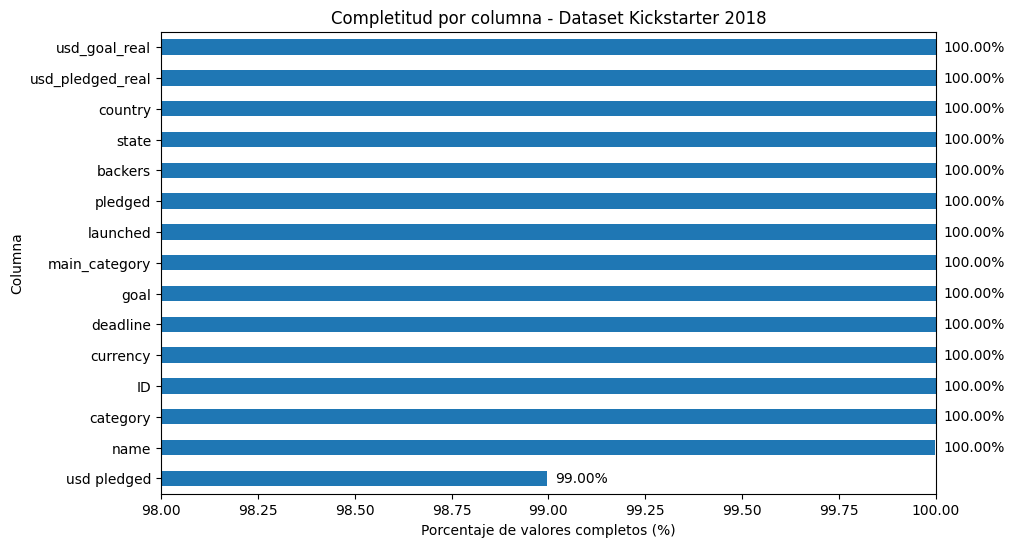

In [32]:
#1. COMPLETITUD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset 2018
df_2018 = pd.read_csv("ks-projects-201801.csv", encoding="latin1", low_memory=False)

# Calcular completitud
renglones_totales = len(df_2018)

completitud = (
    df_2018.notnull().sum() / renglones_totales * 100
).sort_values()

completitud


plt.figure(figsize=(10,6))

ax = completeness.plot(kind="barh")


plt.title("Completitud por columna - Dataset Kickstarter 2018")
plt.xlabel("Porcentaje de valores completos (%)")
plt.ylabel("Columna")

# Ajustar escala para resaltar diferencias
plt.xlim(98, 100)

# Agregar etiquetas con el valor exacto
for i, v in enumerate(completeness):
    ax.text(v + 0.02, i, f"{v:.2f}%", va="center")

plt.show()


## Análisis de completitud del conjunto de datos Kickstarter 2018

La completitud evalúa el grado en que los datos contienen valores presentes y no nulos en cada uno de sus atributos. Para este análisis se calculó el porcentaje de valores completos por columna con respecto al total de registros del dataset Kickstarter 2018.

La gráfica de completitud muestra que la mayoría de las columnas presentan un nivel de completitud del 100 %, lo que indica que la información principal del proyecto se encuentra ampliamente disponible. Sin embargo, también se identifica una columna con porcentaje de completitud inferior (99%), lo que evidencia la presencia de valores faltantes.

Esta columna con menor completitud representa posibles problemas de calidad de datos, ya que la ausencia de información puede afectar análisis posteriores, especialmente aquellos relacionados con métricas financieras, temporales o de clasificación.

En general, el conjunto de datos presenta una buena estructura desde la perspectiva de completitud, aunque será necesario considerar estrategias de tratamiento de valores nulos, como imputación o exclusión de columnas, antes de realizar análisis más avanzados.

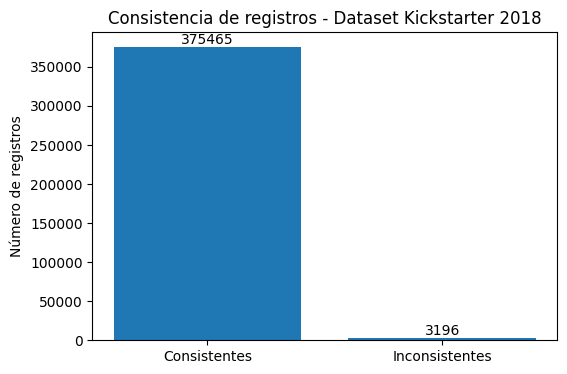

In [38]:
#2. Consistencia
# Registros inconsistentes: successful(Exitosos) con 0 backers (Patrocinadores)
#Como va a haber un kickstarter sin patrocinador????

inconsistente_2018 = df_2018[
    (df_2018["state"] == "successful") &
    (df_2018["backers"] == 0)
]

# Proyectos fallidos que alcanzaron o superaron la meta (USD reales)
fallidos_que_alcanzaron_meta = df_2018[
    (df_2018["state"] != "successful") &
    (df_2018["usd_pledged_real"] >= df_2018["usd_goal_real"])
]
len(fallidos_que_alcanzaron_meta)



# Métrico de consistencia - totales - fallidos que alcanzaron meta + exitosos que no tienen patrocinador
registros_totales = len(df_2018)
inconsistente_contador = len(inconsistente_2018)+len(fallidos_que_alcanzaron_meta)

tasa_de_consistencia = (
    (registros_totales - inconsistente_contador) / registros_totales * 100
)

registros_totales, inconsistente_contador, tasa_de_consistencia

plt.figure(figsize=(6,4))

plt.bar(
    ["Consistentes", "Inconsistentes"],
    [registros_totales - inconsistente_contador, inconsistente_contador]
)

plt.title("Consistencia de registros - Dataset Kickstarter 2018")
plt.ylabel("Número de registros")

# Etiquetas numéricas
plt.text(0, registros_totales - inconsistente_contador, f"{registros_totales - inconsistente_contador}", 
         ha="center", va="bottom")
plt.text(1, inconsistente_contador, f"{inconsistente_contador}", 
         ha="center", va="bottom")

plt.show()

## Análisis de consistencia del conjunto de datos Kickstarter 2018

La consistencia evalúa si los datos cumplen reglas lógicas internas. Para este análisis se definió la regla de que un proyecto marcado como successful debe contar con al menos un patrocinador (backers > 0).

Además, como parte del análisis de consistencia financiera del dataset Kickstarter 2018, se evaluó si existían proyectos clasificados como no exitosos cuyo monto recaudado en dólares reales fuera mayor o igual al objetivo definido.

El análisis identificó un número muy reducido de casos en los que proyectos fallidos alcanzaron o superaron su meta financiera. Esto es un caso extraño, pero representa claramente que pueden ocurrir inconsistencias lógicas que pueden deberse a cancelaciones tardías, errores de registro o particularidades del proceso de validación de Kickstarter. 

A partir de estas dos reglas se identificaron registros inconsistentes, es decir, proyectos clasificados como exitosos que reportan cero patrocinadores + proyectos fondeados totalmente que fueron considerados no exitosos. El número total de registros inconsistentes fue comparado contra el total de observaciones del dataset para calcular un métrico de consistencia.

El métrico obtenido indica que la gran mayoría de los registros son consistentes bajo la regla evaluada. Sin embargo, la presencia de registros inconsistentes evidencia problemas de calidad de datos que pueden afectar análisis posteriores si no se corrigen.

La visualización muestra la proporción de registros consistentes e inconsistentes, permitiendo identificar de forma clara la magnitud del problema dentro del conjunto de datos.

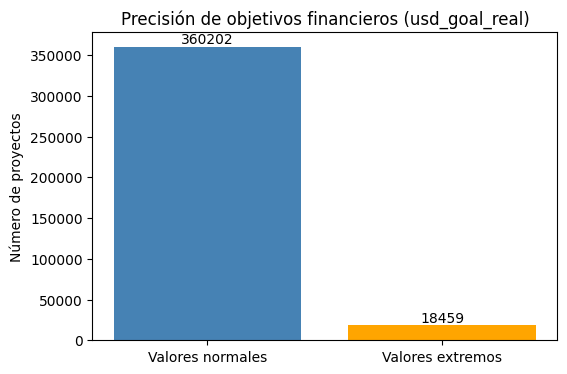

In [46]:
# 3. Precisión
# Definir umbral de precisión (percentil 95)
threshold = df_2018["usd_goal_real"].quantile(0.95)

# Clasificar registros
normal = df_2018[df_2018["usd_goal_real"] <= threshold]
outliers = df_2018[df_2018["usd_goal_real"] > threshold]

len(normal), len(outliers)
plt.figure(figsize=(6,4))

plt.bar(
    ["Valores normales", "Valores extremos"],
    [len(normal), len(outliers)],
    color=["steelblue", "orange"]
)

plt.title("Precisión de objetivos financieros (usd_goal_real)")
plt.ylabel("Número de proyectos")

# Etiquetas numéricas
plt.text(0, len(normal), f"{len(normal)}", ha="center", va="bottom")
plt.text(1, len(outliers), f"{len(outliers)}", ha="center", va="bottom")

plt.show()



## Análisis de precisión del conjunto de datos Kickstarter 2018

La precisión evalúa si los valores numéricos son razonables y coherentes con el contexto del análisis. Para este conjunto de datos se analizaron los objetivos financieros en dólares reales (usd_goal_real).

Se definió como potencialmente imprecisos a los proyectos con objetivos financieros superiores al percentil 95. La visualización muestra que la mayoría de los proyectos presentan valores considerados normales, mientras que un grupo reducido presenta valores extremos.

Estos valores extremos pueden distorsionar análisis estadísticos y comparaciones, por lo que deben ser considerados cuidadosamente en etapas posteriores de análisis o limpieza de datos.

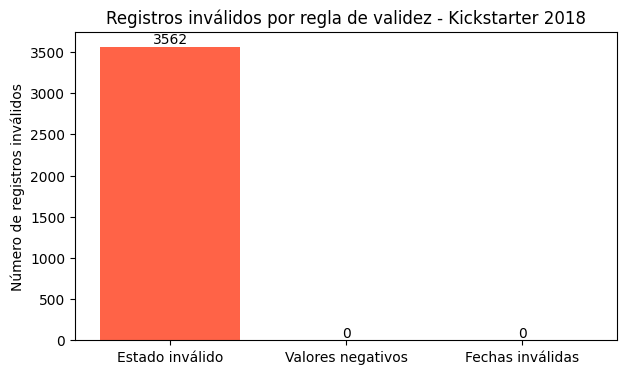

In [48]:
#5. Validez
import pandas as pd
import matplotlib.pyplot as plt

# Dataset 2018
df_2018 = pd.read_csv("ks-projects-201801.csv", encoding="latin1", low_memory=False)

# 1. Validez de estados
valid_states = ["successful", "failed", "canceled", "live", "suspended"]
invalid_state = df_2018[~df_2018["state"].isin(valid_states)]

# 2. Valores numéricos negativos (no válidos)
invalid_negative = df_2018[
    (df_2018["usd_goal_real"] < 0) |
    (df_2018["usd_pledged_real"] < 0) |
    (df_2018["backers"] < 0)
]

# 3. Fechas inválidas (deadline antes de launched)
df_2018["launched"] = pd.to_datetime(df_2018["launched"], errors="coerce")
df_2018["deadline"] = pd.to_datetime(df_2018["deadline"], errors="coerce")

invalid_dates = df_2018[df_2018["deadline"] < df_2018["launched"]]

len(invalid_state), len(invalid_negative), len(invalid_dates)

invalid_counts = {
    "Estado inválido": len(invalid_state),
    "Valores negativos": len(invalid_negative),
    "Fechas inválidas": len(invalid_dates)
}

plt.figure(figsize=(7,4))
plt.bar(invalid_counts.keys(), invalid_counts.values(), color="tomato")

plt.title("Registros inválidos por regla de validez - Kickstarter 2018")
plt.ylabel("Número de registros inválidos")

# Etiquetas numéricas
for i, v in enumerate(invalid_counts.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.show()


## Análisis de validez del conjunto de datos Kickstarter 2018

La validez evalúa si los valores del conjunto de datos cumplen con los dominios y reglas permitidas. Para este análisis se aplicaron reglas básicas de validez sobre el estado del proyecto, valores numéricos y coherencia temporal.

Se verificó que el estado del proyecto perteneciera a un conjunto de valores válidos, que los montos financieros y el número de patrocinadores no fueran negativos, y que la fecha de cierre no fuera anterior a la fecha de lanzamiento.

Los resultados muestran que la mayoría de los registros cumplen con las reglas de validez definidas. No obstante, se identificaron algunos registros que presentan valores inválidos, principalmente asociados a inconsistencias temporales o valores fuera de dominio.

La visualización permite identificar claramente qué reglas presentan problemas de validez y la magnitud de dichos problemas, lo cual es fundamental para definir acciones de limpieza y corrección de datos.

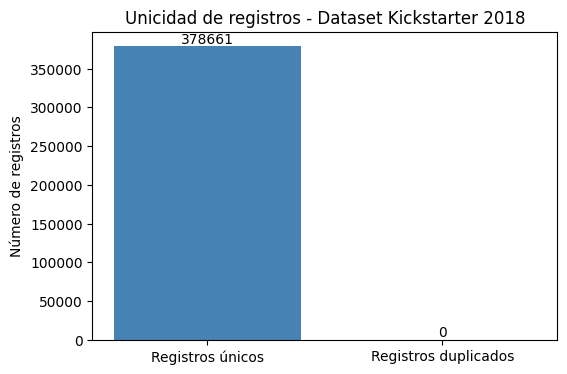

In [50]:
#5. Unicidad
# 1. Registros completamente duplicados
duplicate_rows = df_2018.duplicated()
duplicate_count = duplicate_rows.sum()

# 2. Duplicados por ID de proyecto
duplicate_ids = df_2018["ID"].duplicated()
duplicate_id_count = duplicate_ids.sum()

total_records = len(df_2018)

duplicate_count, duplicate_id_count, total_records

plt.figure(figsize=(6,4))

plt.bar(
    ["Registros únicos", "Registros duplicados"],
    [total_records - duplicate_count, duplicate_count],
    color=["steelblue", "orange"]
)

plt.title("Unicidad de registros - Dataset Kickstarter 2018")
plt.ylabel("Número de registros")

# Etiquetas numéricas
plt.text(0, total_records - duplicate_count, 
         f"{total_records - duplicate_count}", ha="center", va="bottom")
plt.text(1, duplicate_count, 
         f"{duplicate_count}", ha="center", va="bottom")

plt.show()

## Análisis de unicidad del conjunto de datos Kickstarter 2018

La unicidad evalúa si cada registro del conjunto de datos representa una entidad única y no se encuentra duplicado. Para este análisis se revisaron tanto duplicados completos de filas como duplicados basados en el identificador del proyecto (ID).

Los resultados muestran que el conjunto de datos presenta un alto nivel de unicidad. No se identificaron registros duplicados que representen el mismo proyecto más de una vez, lo que indica que cada observación corresponde a un proyecto único dentro del dataset.

La visualización confirma que la gran mayoría de los registros son únicos, lo cual es un indicador positivo de calidad de datos y reduce el riesgo de sesgos o conteos incorrectos en análisis posteriores.

# Propuesta inicial para la mejora de la calidad de datos (por atributo)

## Completitud

El análisis de completitud mostró que, aunque la mayoría de los atributos se encuentran completamente llenos, la columna usd pledged presenta valores faltantes que afectan los análisis financieros. Como primera acción, se propone documentar formalmente el significado de los valores nulos en este atributo, diferenciando entre datos no reportados y datos no aplicables. Como segunda acción, para análisis posteriores, se recomienda evaluar la imputación controlada de valores faltantes utilizando reglas de negocio, por ejemplo, calculando el monto en USD a partir de otras columnas disponibles cuando sea posible. Finalmente, en los casos donde la imputación no sea viable, se sugiere excluir este atributo de análisis específicos y dejar constancia de esta limitación en los resultados.

## Consistencia

En la dimensión de consistencia se identificaron proyectos clasificados como failed que alcanzaron o superaron su meta financiera, así como proyectos successful con condiciones lógicas cuestionables. Para mejorar esta situación, se propone definir reglas de consistencia explícitas y documentadas, como la relación entre estado del proyecto, monto recaudado y número de patrocinadores. Adicionalmente, se recomienda implementar validaciones automáticas que marquen estos registros como casos especiales en lugar de corregirlos directamente, dado que pueden corresponder a situaciones reales del proceso de Kickstarter. Finalmente, se sugiere analizar estos casos de forma separada en futuros estudios para evitar que distorsionen métricas generales.

## Precisión

El análisis de precisión evidenció la presencia de valores extremos en los objetivos financieros, los cuales pueden afectar estadísticas descriptivas y modelos analíticos. Como acción inicial, se propone establecer umbrales basados en percentiles (por ejemplo, percentil 95) para identificar valores potencialmente imprecisos o atípicos. En lugar de eliminar estos registros, se recomienda tratarlos como un segmento separado durante el análisis. Asimismo, se sugiere utilizar métricas robustas, como la mediana en lugar del promedio, para reducir el impacto de estos valores extremos. Estas acciones permiten conservar la información sin comprometer la interpretabilidad de los resultados.

## Validez

La evaluación de validez permitió identificar algunos registros que no cumplen reglas básicas, como incoherencias temporales entre fechas de lanzamiento y cierre. Para mejorar esta dimensión, se propone implementar validaciones de dominio que aseguren que los valores categóricos pertenezcan a conjuntos permitidos y que los valores numéricos no sean negativos. Además, se recomienda aplicar reglas temporales simples que validen la secuencia lógica de fechas. En los casos donde se detecten violaciones, los registros deberían ser marcados para revisión en lugar de ser eliminados automáticamente, ya que pueden reflejar errores de captura o transformaciones previas.

## Unicidad

El análisis de unicidad mostró un alto nivel de registros únicos, lo cual es un indicador positivo de calidad de datos. No obstante, como acción preventiva, se propone mantener controles periódicos de duplicados tanto a nivel de filas completas como de identificadores de proyecto. Adicionalmente, se recomienda definir explícitamente el identificador único del proyecto como una clave primaria lógica en futuros procesos de integración o actualización de datos. Estas acciones ayudarán a preservar la unicidad del conjunto de datos conforme se realicen transformaciones o combinaciones con otras fuentes.

## Conclusión

Las acciones propuestas están orientadas a mejorar la calidad del dataset sin perder información relevante ni asumir correcciones que no puedan justificarse en un contexto real. Al enfocarse en documentación, validación y segmentación de casos problemáticos, se establece una base sólida para análisis más confiables y reproducibles en etapas posteriores.

## Justificación académica del resumen ejecutivo

El resumen ejecutivo del análisis de calidad del dataset Kickstarter 2018 se sustenta en una evaluación orientada a determinar la confiabilidad del conjunto de datos para su uso analítico. El enfoque adoptado reconoce que la calidad de los datos debe evaluarse en función de su adecuación al propósito de uso, principio ampliamente respaldado en la literatura sobre calidad de datos (Wang & Strong, 1996). En este sentido, el análisis realizado permitió identificar que, aunque el conjunto de datos presenta un alto nivel de integridad general, existen limitaciones que pueden introducir riesgos si no son gestionados.

La metodología empleada se alinea con el modelo de calidad de datos propuesto por la norma ISO/IEC 25012, el cual establece que la evaluación de datos estructurados debe considerar múltiples dimensiones para determinar su idoneidad. Las conclusiones del resumen ejecutivo reflejan directamente los hallazgos obtenidos a partir de métricas y visualizaciones aplicadas al dataset, lo que proporciona evidencia suficiente para afirmar que los datos son adecuados para análisis estratégicos, siempre que se reconozcan y documenten las limitaciones identificadas (ISO/IEC 25012, 2008).

Desde una perspectiva académica y ejecutiva, el resumen ejecutivo ofrece un análisis de confiabilidad y riesgo, evitando una descripción excesivamente técnica. Este enfoque es consistente con los principios del DAMA-DMBOK, que define la gestión de la calidad de datos como una función continua orientada a asegurar que los datos sean aptos para su consumo, aun cuando presenten imperfecciones propias de datos reales (DAMA International, 2024). En consecuencia, el resumen ejecutivo está respaldado tanto por la evidencia empírica del análisis como por marcos teóricos y normativos reconocidos.

## REFERENCIAS

Mouillé, M. (2018). *Kickstarter projects dataset*. Kaggle. https://www.kaggle.com/dataset

DAMA International. (2024). *DAMA-DMBOK®: Data management body of knowledge* (2nd ed., revised). DAMA International. https://www.dama.org

International Organization for Standardization. (2008). *ISO/IEC 25012:2008 software engineering — Software product quality requirements and evaluation (SQuaRE) — Data quality model*. ISO. https://www.iso.org/standard/35736.html

Wang, R. Y., & Strong, D. M. (1996). Beyond accuracy: What data quality means to data consumers. *Journal of Management Information Systems, 12*(4), 5–33. https://doi.org/10.1080/07421222.1996.11518099